# Моделирование | Связанные маятники

Два одинаковых математических маятника, связанных пружиной с коэффициентом
жёсткости $k$ на расстоянии $L_1$ от точки крепления маятников. Точки крепления обоих
связанных маятников находятся на одном уровне. Оба математических маятника имеют
одинаковые длины подвеса $L$ и массы $m$ (см. Рис.). Сила сопротивления для каждого
маятника прямо пропорциональна скорости. Коэффициент затухания каждого маятника равен $\beta$. Для заданных начальных отклонений построить графики зависимостей углов и
скоростей от времени для каждого маятника. Найти нормальные частоты. Параметры
должны задаваться.

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

![image.png](./image.png)

In [32]:
def derivatives(Y, t, m1, m2, L, g, k, L1, beta):
  phi1, omega1, phi2, omega2 = Y
  dphi1_dt = omega1
  dphi2_dt = omega2
  domega1_dt = -(g/L)*phi1 - (beta/(m1*L))*omega1 + (k*L1**2/(m1*L**2))*(phi2 - phi1)
  domega2_dt = -(g/L)*phi2 - (beta/(m2*L))*omega2 + (k*L1**2/(m2*L**2))*(phi1 - phi2)
  return [dphi1_dt, domega1_dt, dphi2_dt, domega2_dt]

In [33]:
L = 1.0  # Длина маятника
L1 = 1 # Расстояние от крепежа маятника до места крепления пружины
d = 0.5  # Distance between the pendulums
k = 0.9  # Коэффициент жёсткости пружины
b = 0.05 # Коэффициент затухания
m1 = 1.0  # Масса первого маятника
m2 = 1.0  # Масса второго маятника
g = 9.81  # Ускорение свободного падения


In [34]:
# Начальные фазы и угловые скорости
phi_1 = 0
phi_2 = np.pi/4
y0 = [phi_1, 0, phi_2, 0]

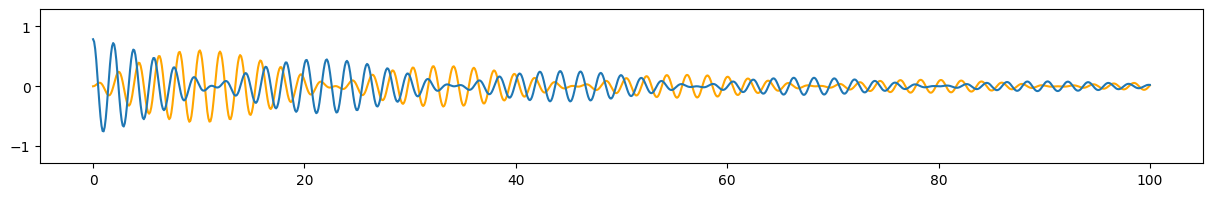

(3.132091952673165, 3.4073450074801643)


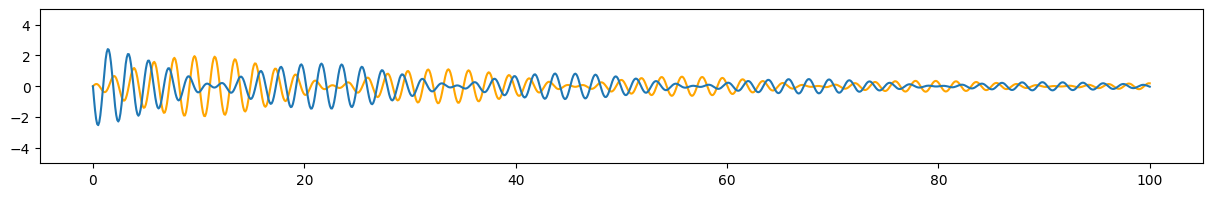

In [35]:
# Время (в секундах и количестве замеров)
t = 100
number_of_measurements = 1000
time = np.linspace(0, t, number_of_measurements)
# Решение дифференциального уравнения
solution = odeint(derivatives, y0, time, args=(m1, m2, L, g, k, L1, b))
phi1 = solution[:, 0]
phi2 = solution[:, 2]
omega1 = solution[:, 1]
omega2 = solution[:, 3]
# Построение графиков углов от времени
plt.figure(figsize=(15, 2))
plt.ylim(-max(phi_1, phi_2)-0.5, max(phi_1, phi_2)+0.5)
plt.plot(time, phi1, label='Phi 1', color="orange")
plt.plot(time, phi2, label='Phi 2')
plt.show()
# Построение графиков скоростей от времени
plt.figure(figsize=(15, 2))
plt.ylim(-5, 5)
plt.plot(time, omega1, label='Omega 1', color="orange")
plt.plot(time, omega2, label='Omega 2')
# Нахождение нормальных частот
def normal_frequencies():
  Omega_1n = math.sqrt(g/L)
  Omega_2n = math.sqrt(g/L + 2*k*L1**2/(m1*L**2))
  return Omega_1n, Omega_2n
print(normal_frequencies())